# **Data Visualization**

# Objectives


The objective of this notebook is to explore and understand the [IBM HR Analytics Employee Attrition & Performance dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)  through descriptive statistics and visual analysis. The focus is on uncovering key patterns and relationships among employee attributes that influence attrition and performance.

# Input
* The input can be found [here]()
* This is a csv file contained the cleaned data outputted by the ETL process.

# Outputs

- All the visualizations have been saved as PNG files and are stored in a designated folder for easy access and reference, which can be found [here](../Images).

---

# Change working directory
Change the working directory from its current folder to its parent folder as the notebooks will be stored in a subfolder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\mikee\\Desktop\\employee-turnover-prediction\\jupyter_notebooks'

Make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\mikee\\Desktop\\employee-turnover-prediction'

Changing path directory to the dataset

In [4]:
#path directory
raw_data_dir = os.path.join(current_dir, 'data_set/raw') 

#path directory
processed_data_dir = os.path.join(current_dir, 'data_set/processed') 


---

# Import packages

In [49]:
import pandas as pd # Import pandas
import matplotlib.pyplot as plt # Import matplotlib
import seaborn as sns # Import seaborn
import plotly.express as px # Import plotly
sns.set_style('whitegrid') # Set style for visuals
from scipy import stats # Import scipy for statistical tests
import pingouin as pg # Import pingouin for statistical tests
from warnings import filterwarnings # Import warnings filterwarnings
filterwarnings('ignore') # Ignore warnings

---

# Load the cleaned dataset

In [6]:
# load the dataset
df = pd.read_csv(os.path.join(processed_data_dir, 'cleaned_employee_attrition.csv'))
df.head()   


,Age,Attrition,DistanceFromHome,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1,2,Sales Executive,4,5993,8,Yes,1,0,5
1,49,No,8,2,Research Scientist,2,5130,1,No,3,1,7
2,37,Yes,2,1,Laboratory Technician,3,2090,6,Yes,3,0,0
3,33,No,3,1,Research Scientist,3,2909,1,Yes,3,3,0
4,27,No,2,1,Laboratory Technician,2,3468,9,No,3,2,2


---

# Hypothesis 2

**Hypothesis:** Employees who work overtime are significantly more likely to quit.  
**Validation:**
- Two-proportion z-test or chi-square test comparing `OverTime = Yes` vs `No` on `Attrition`.
- Plot attrition rates by `OverTime` status.
- (Optional) Logistic regression with `OverTime` as a key predictor.

* H<sub>0</sub>: There is no significant correlation between Overtime and Attrition. (pval => 0.05)
* H<sub>a</sub>: There is a significant correlation between Overtime and Attrition. (pval < 0.05>)

First we will check the distribution of our data.

In [9]:
#create encoded columns for categorical variables
df['Attrition_encoded'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime_encoded'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df.head()

,Age,Attrition,DistanceFromHome,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_encoded,OverTime_encoded
0,41,Yes,1,2,Sales Executive,4,5993,8,Yes,1,0,5,1,1
1,49,No,8,2,Research Scientist,2,5130,1,No,3,1,7,0,0
2,37,Yes,2,1,Laboratory Technician,3,2090,6,Yes,3,0,0,1,1
3,33,No,3,1,Research Scientist,3,2909,1,Yes,3,3,0,0,1
4,27,No,2,1,Laboratory Technician,2,3468,9,No,3,2,2,0,0


In [10]:
#normality test
normality_test = pg.normality(df, dv='OverTime_encoded', group='Attrition_encoded')
normality_test

,W,pval,normal
Attrition_encoded,,,
1,0.634583,3.205658e-22,False
0,0.524661,2.425225e-49,False


Both categories are unevenly distributed.

In [ ]:
#chi-square test show value and p-value

expected, observed, stats = pg.chi2_independence(data=df, x='OverTime', y='Attrition', correction=False)
print(stats)

                 test    lambda       chi2  dof          pval    cramer  power
0             pearson  1.000000  89.043879  1.0  3.861518e-21  0.246118    1.0
1        cressie-read  0.666667  85.987978  1.0  1.810329e-20  0.241858    1.0
2      log-likelihood  0.000000  81.401579  1.0  1.842107e-19  0.235319    1.0
3       freeman-tukey -0.500000  79.119676  1.0  5.845922e-19  0.231998    1.0
4  mod-log-likelihood -1.000000  77.702953  1.0  1.197622e-18  0.229911    1.0
5              neyman -2.000000  77.165249  1.0  1.572360e-18  0.229114    1.0


Check observed distribution against expected distribution. 

In [26]:
print(observed, expected)

Attrition   No  Yes
OverTime           
No         944  110
Yes        289  127 Attrition          No         Yes
OverTime                         
No         884.069388  169.930612
Yes        348.930612   67.069388


The tests show that with a high chi2 (89 for pearson) and pval significantly less than 0.05 that there is a strong correlation between Overtime and Attrition. We can reject the null hypothesis.

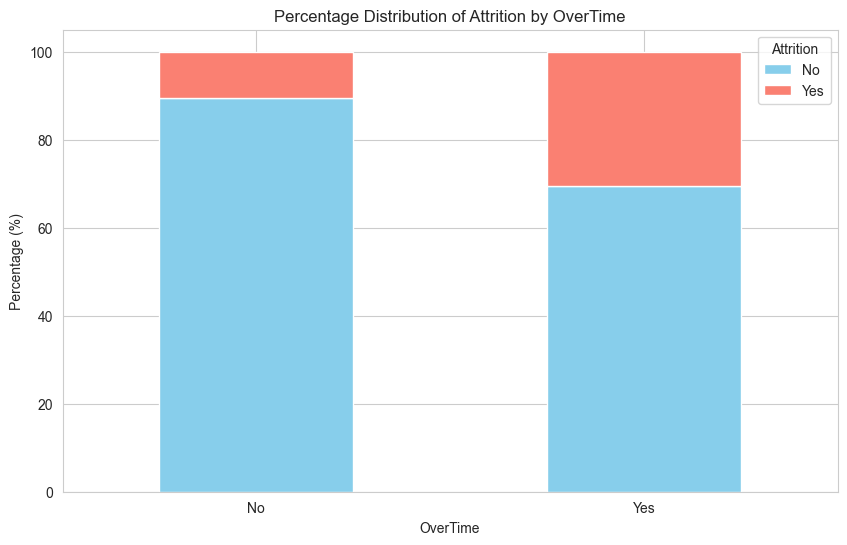

In [ ]:
# Distributions by % for OverTime and Attrition
overtime_attrition = pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100
overtime_attrition.plot(kind='bar', stacked=True, figsize=(10,6), color=['skyblue', 'salmon'])
plt.title('Percentage Distribution of Attrition by Overtime')   
plt.xlabel('Overtime')
plt.ylabel('Percentage (%)')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

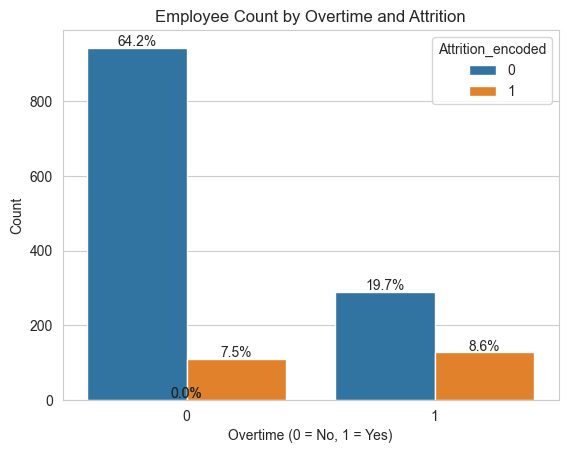

In [ ]:
# Visualize the relationship between Overtime and Attrition
ax = sns.countplot(
    data=df,
    x="OverTime_encoded",
    hue="Attrition_encoded"
)
plt.title("Employee Count by Overtime and Attrition")
plt.xlabel("Overtime (0 = No, 1 = Yes)")
plt.ylabel("Count")

# Add percentage labels
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 5,
        f"{100 * height / total:.1f}%",
        ha="center"
    )
plt.show()


In [38]:
# calculate attrition rates
attrition_rates = df.groupby('OverTime')['Attrition_encoded'].mean().reset_index()
attrition_rates.columns = ['OverTime', 'Attrition_Rate']
attrition_rates['Attrition_Rate'] *= 100  # Convert to percentage
attrition_rates

,OverTime,Attrition_Rate
0,No,10.436433
1,Yes,30.528846


### Key Observations:
- Attrition is significantly higher for employees who do overtime (30% against 10%)
- Our chi2 test clearly showed that there is more than a random relationship between Overtime and Attrition
- The visualisations show this significant relationship 
### Conclusion:
- We can reject the null hypothesis and conclude there is a significant difference between employees who do Overtime and those that do not.

---

# Hypothesis 3

**Hypothesis:** Lower job satisfaction leads to higher attrition.  
**Validation:**
- Independent-samples t-test comparing `JobSatisfaction` between `Attrition = Yes` and `No`.
- Box/violin plot of `JobSatisfaction` by `Attrition`.
- (Optional) Logistic regression including `JobSatisfaction` (and controls).




In [39]:
df[['JobSatisfaction', 'Attrition']].head()

,JobSatisfaction,Attrition
0,4,Yes
1,2,No
2,3,Yes
3,3,No
4,2,No


In [40]:
df['JobSatisfaction'].value_counts()

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

As we already know normality of Attrition we just need to check distribution of JobSatisfaction.

In [43]:
#normality test for JobSatisfaction
normality_test_js = pg.normality(df, dv='JobSatisfaction', group='Attrition')
normality_test_js

,W,pval,normal
Attrition,,,
Yes,0.850929,2.311557e-14,False
No,0.842537,2.875281e-33,False


The distribution is not normal for attrited or non-attrited employees, which we can confirm with a visual check.

We can proceed to a t-tests for the different groups.

In [56]:
##t-test for JobSatisfaction and Attrition
#import t-test function
from scipy.stats import ttest_ind
# Split JobSatisfaction scores by attrition group
leavers = df.loc[df["Attrition_encoded"] == 1, "JobSatisfaction"].dropna()
stayers = df.loc[df["Attrition_encoded"] == 0, "JobSatisfaction"].dropna()

# Perform independent t-test
t_stat, p_val = ttest_ind(leavers, stayers, equal_var=False)  # Welch’s t-test (unequal variances)

# Print summary
print("Independent Samples t-test: JobSatisfaction vs. Attrition")
print("----------------------------------------------------------")
print(f"Mean JobSatisfaction (Leavers): {leavers.mean():.2f}")
print(f"Mean JobSatisfaction (Stayers): {stayers.mean():.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

Independent Samples t-test: JobSatisfaction vs. Attrition
----------------------------------------------------------
Mean JobSatisfaction (Leavers): 2.47
Mean JobSatisfaction (Stayers): 2.78
T-statistic: -3.9261
P-value: 0.0001


The T-statistic shows significant difference between job leavers and stayers with very high confidence (p-value). However as distributions are uneven we can conduct another test (Mann Whitney-U) to confirm validity of results.

In [57]:
#mann-whitney u test
from scipy.stats import mannwhitneyu
u_stat, p_val_mw = mannwhitneyu(leavers, stayers, alternative='two-sided')
print(f"Mann-Whitney U statistic: {u_stat}")
print(f"P-value (Mann-Whitney): {p_val_mw:.4f}")


Mann-Whitney U statistic: 123362.5
P-value (Mann-Whitney): 0.0001


The high U-statistic and low p-value shows that we can confidentally state that our hypothesis is correct and reject the null hypothesis.

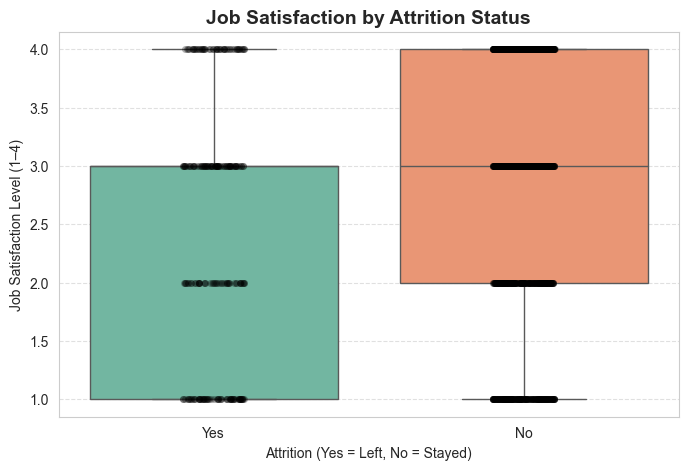

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Make sure Attrition is categorical for clear axis labels
df["Attrition"] = df["Attrition"].map({1: "Yes", 0: "No"}) if df["Attrition"].dtype != 'O' else df["Attrition"]

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x="Attrition",
    y="JobSatisfaction",
    palette="Set2"
)

# Add jittered individual points (optional, for more detail)
sns.stripplot(
    data=df,
    x="Attrition",
    y="JobSatisfaction",
    color="black",
    alpha=0.3,
    jitter=True
)

plt.title("Job Satisfaction by Attrition Status", fontsize=14, fontweight="bold")
plt.xlabel("Attrition (Yes = Left, No = Stayed)")
plt.ylabel("Job Satisfaction Level (1–4)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


The boxplot clearly shows a difference in attrition status between JobSatisfaction levels. 
Let us drill down to get a clearer picture between satisfaction levels.


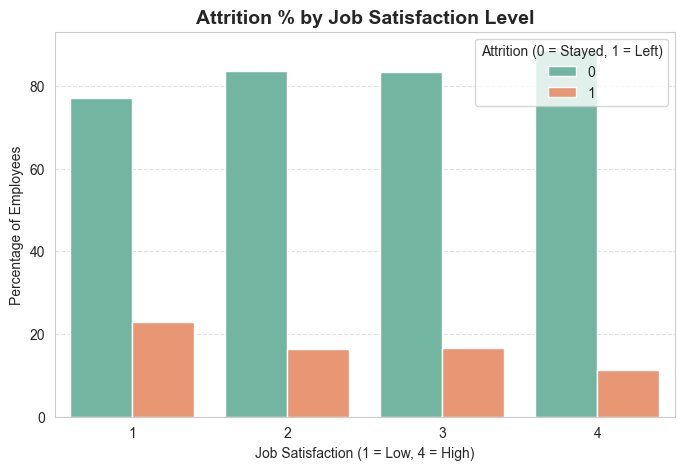

In [61]:
# Visualize JobSatisfaction levels and Attrition rates according to satisfaction level

# Create a proportion table
attrition_pct = (
    df.groupby("JobSatisfaction")["Attrition_encoded"]
    .value_counts(normalize=True)
    .rename("Proportion")
    .reset_index()
)

# Convert to %
attrition_pct["Proportion"] *= 100

# Plot
plt.figure(figsize=(8,5))
sns.barplot(
    data=attrition_pct,
    x="JobSatisfaction",
    y="Proportion",
    hue="Attrition_encoded",
    palette="Set2"
)

plt.title("Attrition % by Job Satisfaction Level", fontsize=14, fontweight="bold")
plt.xlabel("Job Satisfaction (1 = Low, 4 = High)")
plt.ylabel("Percentage of Employees")
plt.legend(title="Attrition (0 = Stayed, 1 = Left)", loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


### Key Observations:
-   There was a clear pattern of increasing attrition at lower levels of job satisfaction.
-   Statistical tests showed significant differences for leavers and stayers with high degree of confidence (pval < 0.5 )
-   There was a clear pattern shown in visualitions of decreasing attrition with increased jo satisfaction
### Conclusion:
-   We can reject the null hypothesis and conclude our hypothesis is true.